In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [103]:
description = pd.read_csv('steamdataset/steam_description_data.csv')
media_data = pd.read_csv('steamdataset/steam_media_data.csv')
requirements_data = pd.read_csv('steamdataset/steam_requirements_data.csv')
support_info = pd.read_csv('steamdataset/steam_support_info.csv')
steam = pd.read_csv('steamdataset/steam.csv')
steam_tag_data = pd.read_csv('steamdataset/steamspy_tag_data.csv')

In [104]:
steam.sample(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
19602,778930,Property,2018-02-02,1,Kimi Karri,Kimi Karri,windows,0,Multi-player;Online Multi-Player;Co-op;Online ...,Violent;Action;Indie,Action;Indie;Violent,11,49,13,0,0,0-20000,0.79
1960,250720,Starlight Inception™,2014-04-22,1,"Escape Hatch Entertainment, LLC","Escape Hatch Entertainment, LLC",windows,12,Single-player;Multi-player;Shared/Split Screen...,Action;Indie;Simulation,Action;Simulation;Indie,0,10,44,0,0,0-20000,6.99
1160,115200,Cossacks II: Napoleonic Wars,2011-08-26,1,GSC Game World,GSC World Publishing,windows,0,Single-player;Multi-player;Online Multi-Player...,Strategy,Strategy;RTS;Historical,0,151,183,17,17,50000-100000,3.99
18597,750770,Labyronia Elements,2017-12-03,1,Labyrinthine,Labyrinthine,windows,0,Single-player;Steam Achievements;Full controll...,Adventure;Indie;RPG;Strategy,Indie;Adventure;RPG,20,11,2,0,0,0-20000,4.79
6949,406670,Impossible Geometry,2016-05-12,1,Burnin Ape;Onivia Games,Burnin Ape,windows,0,Single-player;Steam Trading Cards,Adventure;Casual;Indie,Indie;Casual;Adventure,0,10,8,0,0,0-20000,1.99


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


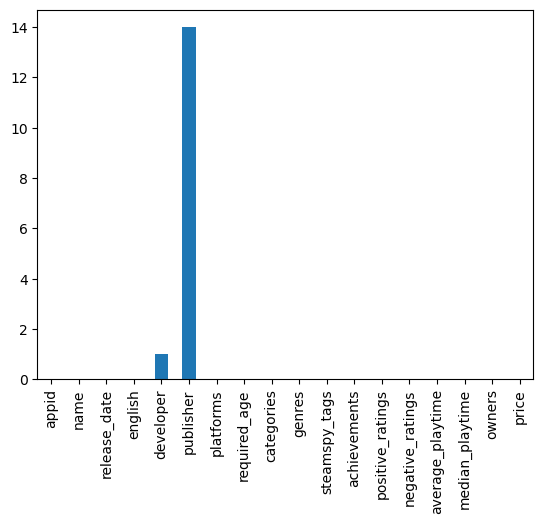

In [105]:
steam_na = steam.isna().sum()
print(steam_na)
steam_na.plot(kind='bar')
plt.show()


In [106]:
# since the number of missing values is small relativ to the dataset , im gonna drop those lines
original_df = steam.dropna() # steam.fillna('Missing')
original_df.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [107]:
df = original_df.copy()
df['p_n_rating_ratio'] = np.where(df['negative_ratings'] == 0, np.nan, df['positive_ratings'] / df['negative_ratings']).round(2)
df.head(5)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,p_n_rating_ratio
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,37.30
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5.24
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,8.58
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,4.77
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,18.23


In [108]:
#check if there 
(df['price'] == 0).any()

True

In [109]:
def categorize_based_onprice(price):
    if price == 0 :
        return 'Free'
    else :
        return 'Paid'
df['price_category'] = df['price'].apply(categorize_based_onprice)


In [110]:
# take a look on the others data
media_data.sample(3)


,steam_appid,header_image,screenshots,background,movies
3379,305660,https://steamcdn-a.akamaihd.net/steam/apps/305...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/305...,"[{'id': 2039201, 'name': 'Infect and Destroy T..."
11335,537430,https://steamcdn-a.akamaihd.net/steam/apps/537...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/537...,"[{'id': 256682237, 'name': 'Inner Chains - Cin..."
8424,450740,https://steamcdn-a.akamaihd.net/steam/apps/450...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/450...,"[{'id': 256662598, 'name': 'Mind Unleashed Tra..."


In [111]:
description.sample(3)

,steam_appid,detailed_description,about_the_game,short_description
24695,934840,FrostRunner is a first-person platformer “spee...,FrostRunner is a first-person platformer “spee...,FrostRunner is a first-person platformer “spee...
1333,208750,"The Gods of Olympus have abandoned humanity, l...","The Gods of Olympus have abandoned humanity, l...",Apotheon is a heroic action game set within th...
8221,446120,Bunker Punks is a fast paced rogue-light FPS s...,Bunker Punks is a fast paced rogue-light FPS s...,Bunker Punks is a fast paced rogue-light FPS s...


In [112]:
steam_media_data = pd.merge(df,media_data,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df = pd.merge(steam_media_data,description,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df.sample(3).T

,22128,2382,24706
appid,855010,268320,941870
name,270 | Two Seventy US Election,Grapple,Medieval Survival
release_date,2018-05-31,2015-03-09,2018-10-02
english,1,1,1
developer,Political Games LLC,Tuesday Society,Falco Games
publisher,Political Games LLC,Midnight City;Majesco Entertainment,Falco Games
platforms,windows;mac,windows,windows
required_age,0,0,0
categories,Single-player;Multi-player;Online Multi-Player...,Single-player;Steam Achievements;Steam Trading...,Single-player
genres,Strategy,Indie,Action;Adventure;Indie


 The Game : Door Kickers: Action Squad is Paid and has the following PNR-Ratio 12.24  


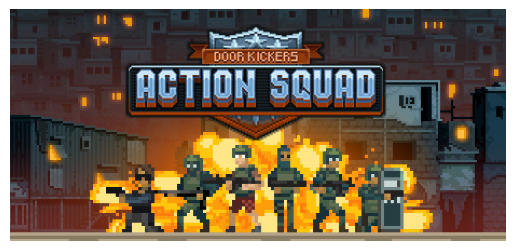

 The Game : The Sun Will Rise is Free and has the following PNR-Ratio 1.11  


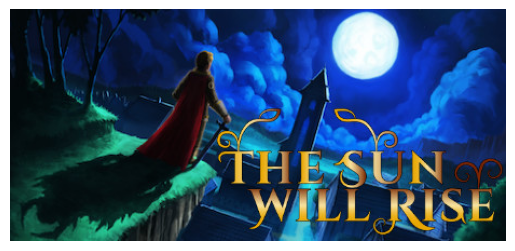

 The Game : Gyrodisc Super League is Paid and has the following PNR-Ratio 1.6  


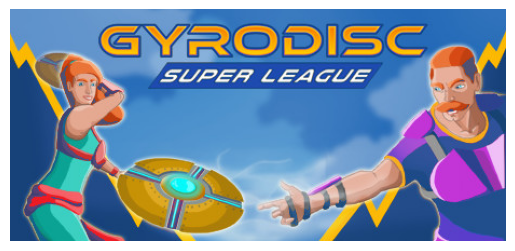

 The Game : Unrested Development is Paid and has the following PNR-Ratio 1.67  


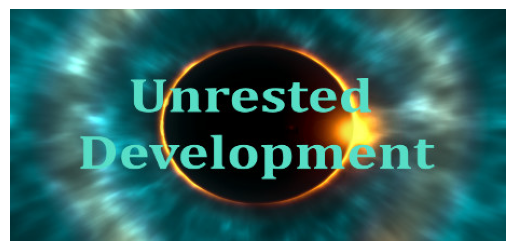

 The Game : Super Streaker Plus is Paid and has the following PNR-Ratio nan  


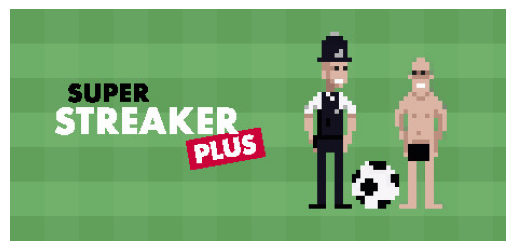

In [120]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
for index, row in final_merged_df.sample(5).iterrows():
    print(f" The Game : {row['name']} is {row['price_category']} and has the following PNR-Ratio {row['p_n_rating_ratio']}  ")
    response = requests.get(row['header_image'])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()